In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
import pingouin as pg
from params import *
from bibliotheque import *

In [3]:
subject_keys = ['P01','P02','P03','P04','P05','P06','P07','P08','P09','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29','P30']

In [4]:
concat = []
for participant in subject_keys:
    df_participant = pd.read_excel(data_path + f'{participant}/questionnaires/cotations_odeurs_absolues_{participant}.xlsx')
    concat.append(df_participant)
cotations_absolues = pd.concat(concat)

In [5]:
cotations_absolues

,participant,odeur_num,odeur_label,odeur_name,appréciation_absolue,longueur_totale,appréciation_absolue_normalisée
0,P01,1,FO,Feuille d'Olivier,154,158,0.974684
1,P01,2,FP,Floral Printanier,146,158,0.924051
2,P01,3,R,Rose,82,158,0.518987
3,P01,4,PL,Pêche Lavande,151,158,0.955696
4,P01,5,FoE,Fleur d'oranger épicé,130,158,0.822785
...,...,...,...,...,...,...,...
8,P30,9,BE,Bois épicé,99,158,0.626582
9,P30,10,Ox,Oxygène,104,158,0.658228
10,P30,11,DiA,Diacétyl,85,158,0.537975
11,P30,12,HeA,Huile essentielle Ail,15,158,0.094937


<AxesSubplot: xlabel='odeur_label', ylabel='appréciation_absolue_normalisée'>

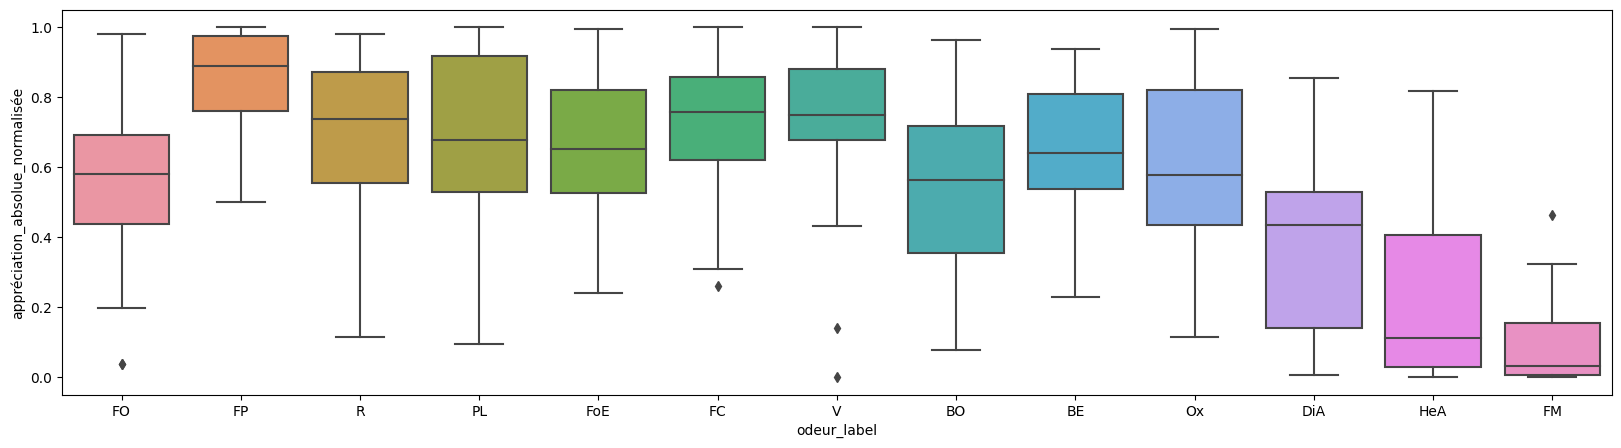

In [6]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data=cotations_absolues, x='odeur_label', y = 'appréciation_absolue_normalisée', ax=ax)

In [7]:
concat = []
for participant in subject_keys:
    df_participant = pd.read_excel(data_path + f'{participant}/questionnaires/cotations_odeurs_relatives_{participant}.xlsx')
    concat.append(df_participant)
cotations_relatives = pd.concat(concat)

In [8]:
cotations_relatives

,participant,odeur_num,odeur_label,odeur_name,appréciation_absolue,appréciation_absolue_normalisée,longueur_totale,appréciation_relative,appréciation_relative_normalisée,intensité_émotionnelle_relative,intensité_émotionnelle_relative_normalisée,familiarité_relative,familiarité_relative_normalisée,intensité_relative,intensité_relative_normalisée,evocation_relative,evocation_relative_normalisée
0,P01,1.0,FO,Feuille d'Olivier,154.0,0.974684,158.0,154.0,0.974684,151.0,0.955696,146.0,0.924051,139,0.879747,148.0,0.936709
1,P01,4.0,PL,Pêche Lavande,151.0,0.955696,158.0,150.0,0.949367,123.0,0.778481,100.0,0.632911,97,0.613924,117.0,0.740506
2,P01,8.0,BO,Blue Ocean,152.0,0.962025,158.0,145.0,0.917722,110.0,0.696203,90.0,0.569620,87,0.550633,56.0,0.354430
3,P01,11.0,DiA,Diacétyl,3.0,0.018987,158.0,0.0,0.000000,158.0,1.000000,0.0,0.000000,157,0.993671,0.0,0.000000
4,P01,12.0,HeA,Huile essentielle Ail,3.0,0.018987,158.0,12.0,0.075949,146.0,0.924051,132.0,0.835443,148,0.936709,118.0,0.746835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,P30,3.0,R,Rose,139.0,0.879747,158.0,94.0,0.594937,18.0,0.113924,105.0,0.664557,15,0.094937,66.0,0.417722
2,P30,4.0,PL,Pêche Lavande,149.0,0.943038,158.0,139.0,0.879747,75.0,0.474684,45.0,0.284810,64,0.405063,6.0,0.037975
3,P30,11.0,DiA,Diacetyl,85.0,0.537975,158.0,18.0,0.113924,12.0,0.075949,85.0,0.537975,5,0.031646,17.0,0.107595
4,P30,12.0,HeA,Huile Essentielle d’Ail,15.0,0.094937,158.0,29.0,0.183544,142.0,0.898734,147.0,0.930380,155,0.981013,28.0,0.177215


<AxesSubplot: >

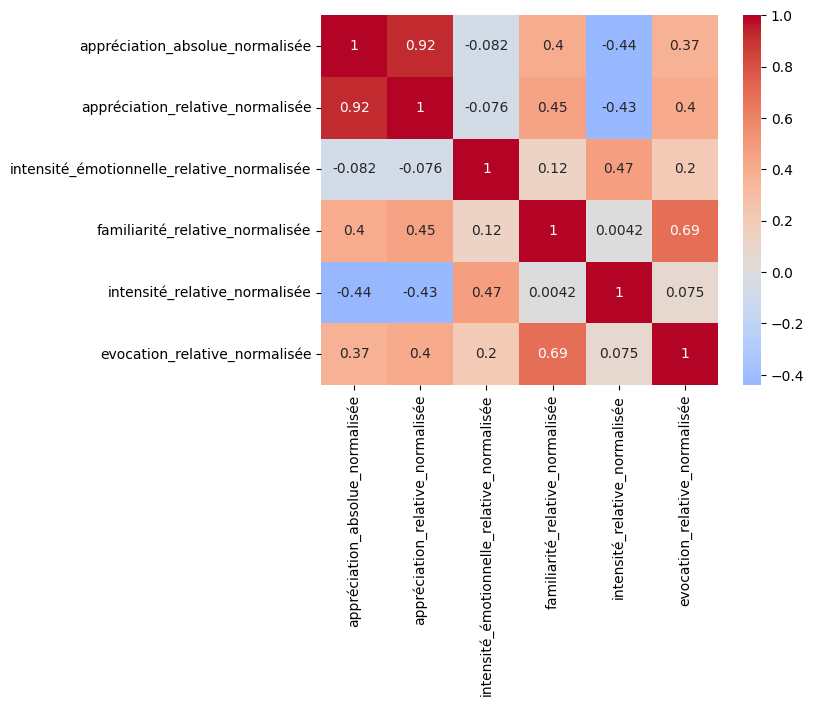

In [9]:
sns.heatmap(cotations_relatives.loc[:,['appréciation_absolue_normalisée','appréciation_relative_normalisée','intensité_émotionnelle_relative_normalisée','familiarité_relative_normalisée','intensité_relative_normalisée','evocation_relative_normalisée']].corr('pearson'), cmap = 'coolwarm', center = 0, annot = True)

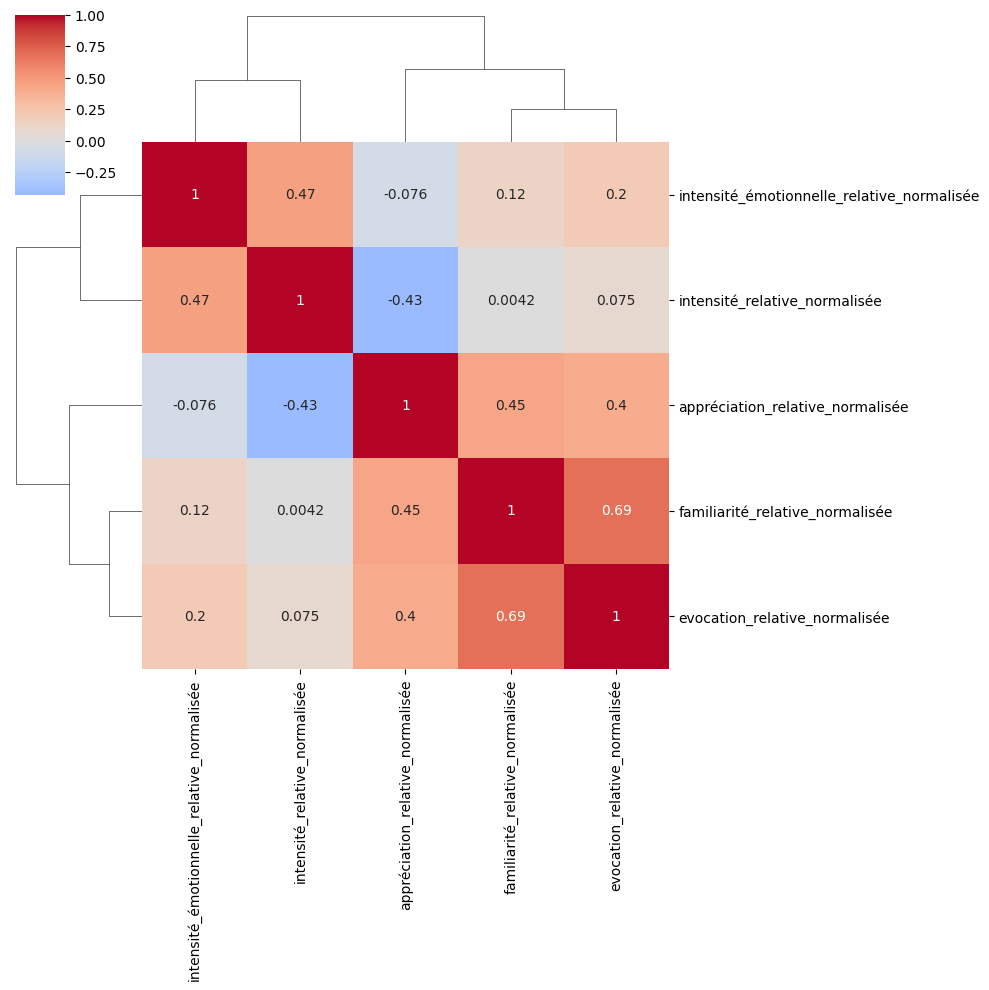

In [10]:
sns.clustermap(cotations_relatives.loc[:,['appréciation_relative_normalisée','intensité_émotionnelle_relative_normalisée','familiarité_relative_normalisée','intensité_relative_normalisée','evocation_relative_normalisée']].corr(), cmap = 'coolwarm', center = 0, annot = True)

In [11]:
cotations_relatives.loc[:,['appréciation_absolue_normalisée','appréciation_relative_normalisée','intensité_émotionnelle_relative_normalisée','familiarité_relative_normalisée','intensité_relative_normalisée','evocation_relative_normalisée']].rcorr()

,appréciation_absolue_normalisée,appréciation_relative_normalisée,intensité_émotionnelle_relative_normalisée,familiarité_relative_normalisée,intensité_relative_normalisée,evocation_relative_normalisée
appréciation_absolue_normalisée,-,***,,***,***,***
appréciation_relative_normalisée,0.923,-,,***,***,***
intensité_émotionnelle_relative_normalisée,-0.082,-0.076,-,,***,**
familiarité_relative_normalisée,0.401,0.445,0.124,-,,***
intensité_relative_normalisée,-0.439,-0.429,0.469,0.004,-,
evocation_relative_normalisée,0.369,0.405,0.203,0.686,0.075,-


In [12]:
cotations_relatives['familiarité_relative_normalisée'].mean()

0.5798523206751055

Text(0.5, 1.0, 'N = 181')

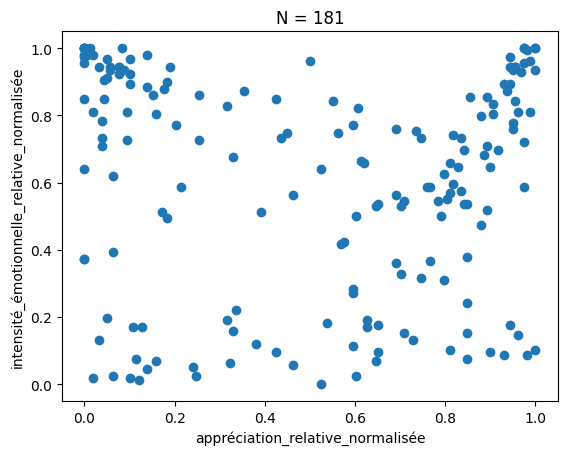

In [13]:
fig, ax = plt.subplots()
x = 'appréciation_relative_normalisée'
y = 'intensité_émotionnelle_relative_normalisée'
ax.scatter(cotations_relatives[x],  cotations_relatives[y])
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_title(f'N = {cotations_relatives.shape[0]}')


In [14]:
metadata = get_metadata()

In [15]:
metadata

,pseudonyme,gender,label_odor+,label_odor-,head_circumference,bonnet,freq_resp_free,ses01,ses02,ses03,ses04,hardest_bloc
participant,,,,,,,,,,,,
P01,CM01,F,FO,FM,56.0,56,0.23,odor_sel,odor_-,odor_o,odor_+,Fast
P02,DV02,F,V,DiA,56.0,56,0.27,odor_sel,odor_o,odor_+,odor_-,Slow
P03,CA03,F,FoE,HeA,54.0,54,0.27,odor_sel,odor_o,odor_-,odor_+,Slow
P04,BC04,F,BE,DiA,56.5,56,0.20,odor_sel,odor_+,odor_o,odor_-,Slow
P05,ML05,F,PL,HeA,56.0,56,0.25,odor_sel,odor_o,odor_-,odor_+,Fast
P06,PE06,F,FO,HeA,54.5,54,0.30,odor_sel,odor_-,odor_+,odor_o,Fast
P07,MA07,F,V,Ox,56.0,56,0.29,odor_sel,odor_+,odor_o,odor_-,Fast
P08,OK08,F,R,DiA,56.0,56,0.21,odor_sel,odor_o,odor_+,odor_-,Fast
P09,SE09,M,V,HeA,55.0,56,0.22,odor_sel,odor_-,odor_+,odor_o,Slow


<AxesSubplot: >

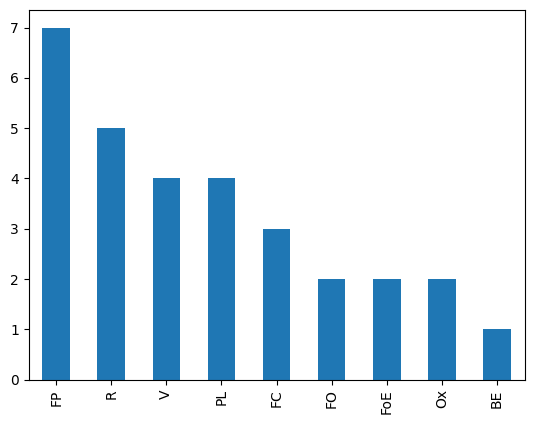

In [16]:
metadata['label_odor+'].value_counts().plot.bar()

<AxesSubplot: >

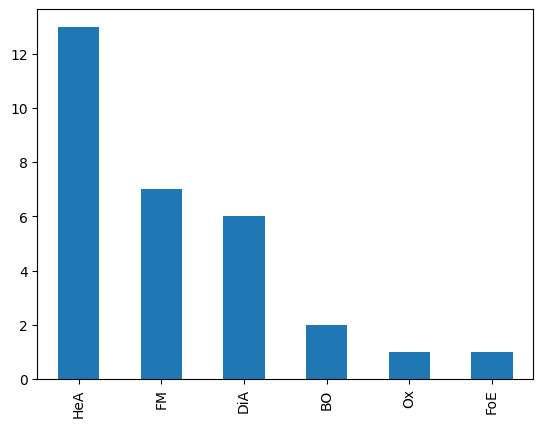

In [17]:
metadata['label_odor-'].value_counts().plot.bar()

In [18]:
cotations_relatives

,participant,odeur_num,odeur_label,odeur_name,appréciation_absolue,appréciation_absolue_normalisée,longueur_totale,appréciation_relative,appréciation_relative_normalisée,intensité_émotionnelle_relative,intensité_émotionnelle_relative_normalisée,familiarité_relative,familiarité_relative_normalisée,intensité_relative,intensité_relative_normalisée,evocation_relative,evocation_relative_normalisée
0,P01,1.0,FO,Feuille d'Olivier,154.0,0.974684,158.0,154.0,0.974684,151.0,0.955696,146.0,0.924051,139,0.879747,148.0,0.936709
1,P01,4.0,PL,Pêche Lavande,151.0,0.955696,158.0,150.0,0.949367,123.0,0.778481,100.0,0.632911,97,0.613924,117.0,0.740506
2,P01,8.0,BO,Blue Ocean,152.0,0.962025,158.0,145.0,0.917722,110.0,0.696203,90.0,0.569620,87,0.550633,56.0,0.354430
3,P01,11.0,DiA,Diacétyl,3.0,0.018987,158.0,0.0,0.000000,158.0,1.000000,0.0,0.000000,157,0.993671,0.0,0.000000
4,P01,12.0,HeA,Huile essentielle Ail,3.0,0.018987,158.0,12.0,0.075949,146.0,0.924051,132.0,0.835443,148,0.936709,118.0,0.746835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,P30,3.0,R,Rose,139.0,0.879747,158.0,94.0,0.594937,18.0,0.113924,105.0,0.664557,15,0.094937,66.0,0.417722
2,P30,4.0,PL,Pêche Lavande,149.0,0.943038,158.0,139.0,0.879747,75.0,0.474684,45.0,0.284810,64,0.405063,6.0,0.037975
3,P30,11.0,DiA,Diacetyl,85.0,0.537975,158.0,18.0,0.113924,12.0,0.075949,85.0,0.537975,5,0.031646,17.0,0.107595
4,P30,12.0,HeA,Huile Essentielle d’Ail,15.0,0.094937,158.0,29.0,0.183544,142.0,0.898734,147.0,0.930380,155,0.981013,28.0,0.177215


In [19]:
cotations_relatives_stats = cotations_relatives.copy()
cotations_relatives_stats['choice'] = np.nan

In [20]:
cotations_relatives_stats

,participant,odeur_num,odeur_label,odeur_name,appréciation_absolue,appréciation_absolue_normalisée,longueur_totale,appréciation_relative,appréciation_relative_normalisée,intensité_émotionnelle_relative,intensité_émotionnelle_relative_normalisée,familiarité_relative,familiarité_relative_normalisée,intensité_relative,intensité_relative_normalisée,evocation_relative,evocation_relative_normalisée,choice
0,P01,1.0,FO,Feuille d'Olivier,154.0,0.974684,158.0,154.0,0.974684,151.0,0.955696,146.0,0.924051,139,0.879747,148.0,0.936709,NaN
1,P01,4.0,PL,Pêche Lavande,151.0,0.955696,158.0,150.0,0.949367,123.0,0.778481,100.0,0.632911,97,0.613924,117.0,0.740506,NaN
2,P01,8.0,BO,Blue Ocean,152.0,0.962025,158.0,145.0,0.917722,110.0,0.696203,90.0,0.569620,87,0.550633,56.0,0.354430,NaN
3,P01,11.0,DiA,Diacétyl,3.0,0.018987,158.0,0.0,0.000000,158.0,1.000000,0.0,0.000000,157,0.993671,0.0,0.000000,NaN
4,P01,12.0,HeA,Huile essentielle Ail,3.0,0.018987,158.0,12.0,0.075949,146.0,0.924051,132.0,0.835443,148,0.936709,118.0,0.746835,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,P30,3.0,R,Rose,139.0,0.879747,158.0,94.0,0.594937,18.0,0.113924,105.0,0.664557,15,0.094937,66.0,0.417722,NaN
2,P30,4.0,PL,Pêche Lavande,149.0,0.943038,158.0,139.0,0.879747,75.0,0.474684,45.0,0.284810,64,0.405063,6.0,0.037975,NaN
3,P30,11.0,DiA,Diacetyl,85.0,0.537975,158.0,18.0,0.113924,12.0,0.075949,85.0,0.537975,5,0.031646,17.0,0.107595,NaN
4,P30,12.0,HeA,Huile Essentielle d’Ail,15.0,0.094937,158.0,29.0,0.183544,142.0,0.898734,147.0,0.930380,155,0.981013,28.0,0.177215,NaN


In [21]:
metadata.head()

,pseudonyme,gender,label_odor+,label_odor-,head_circumference,bonnet,freq_resp_free,ses01,ses02,ses03,ses04,hardest_bloc
participant,,,,,,,,,,,,
P01,CM01,F,FO,FM,56.0,56,0.23,odor_sel,odor_-,odor_o,odor_+,Fast
P02,DV02,F,V,DiA,56.0,56,0.27,odor_sel,odor_o,odor_+,odor_-,Slow
P03,CA03,F,FoE,HeA,54.0,54,0.27,odor_sel,odor_o,odor_-,odor_+,Slow
P04,BC04,F,BE,DiA,56.5,56,0.20,odor_sel,odor_+,odor_o,odor_-,Slow
P05,ML05,F,PL,HeA,56.0,56,0.25,odor_sel,odor_o,odor_-,odor_+,Fast


In [22]:
cotations_relatives_stats = cotations_relatives_stats.set_index(['participant','odeur_label'])

In [23]:
for participant in subject_keys:
    for label_odors, label in (['label_odor+','label_odor-'],['O+','O-']):
        cotations_relatives_stats.loc[(participant,label_odors),'choice'] = label

In [24]:
cotations_relatives_stats

odeur_num             odeur_name  \
participant odeur_label                                     
P01         FO                 1.0      Feuille d'Olivier   
            PL                 4.0          Pêche Lavande   
            BO                 8.0             Blue Ocean   
            DiA               11.0               Diacétyl   
            HeA               12.0  Huile essentielle Ail   
...                            ...                    ...   
P28         O+                 NaN                    NaN   
P29         label_odor+        NaN                    NaN   
            O+                 NaN                    NaN   
P30         label_odor+        NaN                    NaN   
            O+                 NaN                    NaN   

                         appréciation_absolue  \
participant odeur_label                         
P01         FO                          154.0   
            PL                          151.0   
            BO                          152.0   
            DiA                           3.0   
            HeA                           3.0   
...                                       ...   
P28         O+                            NaN   
P29         label_odor+                   NaN   
            O+                            NaN   
P30         label_odor+                   NaN   
            O+                            NaN   

                         appréciation_absolue_normalisée  longueur_totale  \
participant odeur_label                                                     
P01         FO                                  0.974684            158.0   
            PL                                  0.955696            158.0   
            BO                                  0.962025            158.0   
            DiA                                 0.018987            158.0   
            HeA                                 0.018987            158.0   
...                                                  ...              ...   
P28         O+                                       NaN              NaN   
P29         label_odor+                              NaN              NaN   
            O+                                       NaN              NaN   
P30         label_odor+                              NaN              NaN   
            O+                                       NaN              NaN   

                         appréciation_relative  \
participant odeur_label                          
P01         FO                           154.0   
            PL                           150.0   
            BO                           145.0   
            DiA                            0.0   
            HeA                           12.0   
...                                        ...   
P28         O+                             NaN   
P29         label_odor+                    NaN   
            O+                             NaN   
P30         label_odor+                    NaN   
            O+                             NaN   

                         appréciation_relative_normalisée  \
participant odeur_label                                     
P01         FO                                   0.974684   
            PL                                   0.949367   
            BO                                   0.917722   
            DiA                                  0.000000   
            HeA                                  0.075949   
...                                                   ...   
P28         O+                                        NaN   
P29         label_odor+                               NaN   
            O+                                        NaN   
P30         label_odor+                               NaN   
            O+                                        NaN   

                         intensité_émotionnelle_relative  \
participant odeur_label                                    
P01         FO            

<AxesSubplot: xlabel='choice', ylabel='appréciation_absolue'>

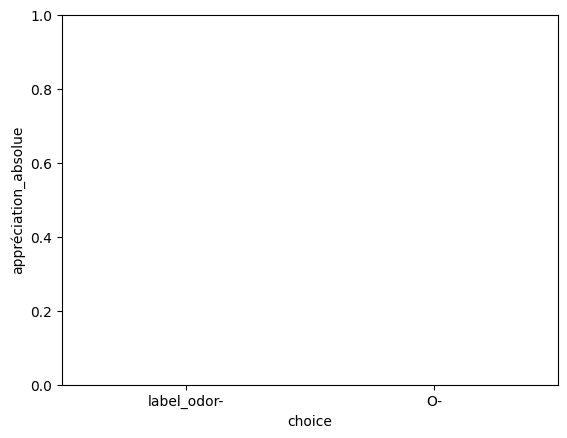

In [25]:
sns.boxplot(data=cotations_relatives_stats.reset_index(), x = 'choice', y = 'appréciation_absolue')

In [26]:
metadata

,pseudonyme,gender,label_odor+,label_odor-,head_circumference,bonnet,freq_resp_free,ses01,ses02,ses03,ses04,hardest_bloc
participant,,,,,,,,,,,,
P01,CM01,F,FO,FM,56.0,56,0.23,odor_sel,odor_-,odor_o,odor_+,Fast
P02,DV02,F,V,DiA,56.0,56,0.27,odor_sel,odor_o,odor_+,odor_-,Slow
P03,CA03,F,FoE,HeA,54.0,54,0.27,odor_sel,odor_o,odor_-,odor_+,Slow
P04,BC04,F,BE,DiA,56.5,56,0.20,odor_sel,odor_+,odor_o,odor_-,Slow
P05,ML05,F,PL,HeA,56.0,56,0.25,odor_sel,odor_o,odor_-,odor_+,Fast
P06,PE06,F,FO,HeA,54.5,54,0.30,odor_sel,odor_-,odor_+,odor_o,Fast
P07,MA07,F,V,Ox,56.0,56,0.29,odor_sel,odor_+,odor_o,odor_-,Fast
P08,OK08,F,R,DiA,56.0,56,0.21,odor_sel,odor_o,odor_+,odor_-,Fast
P09,SE09,M,V,HeA,55.0,56,0.22,odor_sel,odor_-,odor_+,odor_o,Slow


In [27]:
cotations_relatives

,participant,odeur_num,odeur_label,odeur_name,appréciation_absolue,appréciation_absolue_normalisée,longueur_totale,appréciation_relative,appréciation_relative_normalisée,intensité_émotionnelle_relative,intensité_émotionnelle_relative_normalisée,familiarité_relative,familiarité_relative_normalisée,intensité_relative,intensité_relative_normalisée,evocation_relative,evocation_relative_normalisée
0,P01,1.0,FO,Feuille d'Olivier,154.0,0.974684,158.0,154.0,0.974684,151.0,0.955696,146.0,0.924051,139,0.879747,148.0,0.936709
1,P01,4.0,PL,Pêche Lavande,151.0,0.955696,158.0,150.0,0.949367,123.0,0.778481,100.0,0.632911,97,0.613924,117.0,0.740506
2,P01,8.0,BO,Blue Ocean,152.0,0.962025,158.0,145.0,0.917722,110.0,0.696203,90.0,0.569620,87,0.550633,56.0,0.354430
3,P01,11.0,DiA,Diacétyl,3.0,0.018987,158.0,0.0,0.000000,158.0,1.000000,0.0,0.000000,157,0.993671,0.0,0.000000
4,P01,12.0,HeA,Huile essentielle Ail,3.0,0.018987,158.0,12.0,0.075949,146.0,0.924051,132.0,0.835443,148,0.936709,118.0,0.746835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,P30,3.0,R,Rose,139.0,0.879747,158.0,94.0,0.594937,18.0,0.113924,105.0,0.664557,15,0.094937,66.0,0.417722
2,P30,4.0,PL,Pêche Lavande,149.0,0.943038,158.0,139.0,0.879747,75.0,0.474684,45.0,0.284810,64,0.405063,6.0,0.037975
3,P30,11.0,DiA,Diacetyl,85.0,0.537975,158.0,18.0,0.113924,12.0,0.075949,85.0,0.537975,5,0.031646,17.0,0.107595
4,P30,12.0,HeA,Huile Essentielle d’Ail,15.0,0.094937,158.0,29.0,0.183544,142.0,0.898734,147.0,0.930380,155,0.981013,28.0,0.177215


In [28]:
cotations_relatives_participant_index = cotations_relatives.set_index(['participant','odeur_label'])

In [29]:
cotations_relatives_participant_index

odeur_num               odeur_name  \
participant odeur_label                                       
P01         FO                 1.0        Feuille d'Olivier   
            PL                 4.0            Pêche Lavande   
            BO                 8.0               Blue Ocean   
            DiA               11.0                 Diacétyl   
            HeA               12.0    Huile essentielle Ail   
...                            ...                      ...   
P30         R                  3.0                     Rose   
            PL                 4.0            Pêche Lavande   
            DiA               11.0                 Diacetyl   
            HeA               12.0  Huile Essentielle d’Ail   
            FM                13.0       Furfuryl Mercaptan   

                         appréciation_absolue  \
participant odeur_label                         
P01         FO                          154.0   
            PL                          151.0   
            BO                          152.0   
            DiA                           3.0   
            HeA                           3.0   
...                                       ...   
P30         R                           139.0   
            PL                          149.0   
            DiA                          85.0   
            HeA                          15.0   
            FM                           44.0   

                         appréciation_absolue_normalisée  longueur_totale  \
participant odeur_label                                                     
P01         FO                                  0.974684            158.0   
            PL                                  0.955696            158.0   
            BO                                  0.962025            158.0   
            DiA                                 0.018987            158.0   
            HeA                                 0.018987            158.0   
...                                                  ...              ...   
P30         R                                   0.879747            158.0   
            PL                                  0.943038            158.0   
            DiA                                 0.537975            158.0   
            HeA                                 0.094937            158.0   
            FM                                  0.278481            158.0   

                         appréciation_relative  \
participant odeur_label                          
P01         FO                           154.0   
            PL                           150.0   
            BO                           145.0   
            DiA                            0.0   
            HeA                           12.0   
...                                        ...   
P30         R                             94.0   
            PL                           139.0   
            DiA                           18.0   
            HeA                           29.0   
            FM                             9.0   

                         appréciation_relative_normalisée  \
participant odeur_label                                     
P01         FO                                   0.974684   
            PL                                   0.949367   
            BO                                   0.917722   
            DiA                                  0.000000   
            HeA                                  0.075949   
...                                                   ...   
P30         R                                    0.594937   
            PL                                   0.879747   
            DiA                                  0.113924   
            HeA                                  0.183544   
            FM                                   0.056962   

                         intensité_émotionnelle_relative  \
participant odeur_label                                    


In [30]:
cotations_relatives_participant_index.columns

Index(['odeur_num', 'odeur_name', 'appréciation_absolue',
       'appréciation_absolue_normalisée', 'longueur_totale',
       'appréciation_relative', 'appréciation_relative_normalisée',
       'intensité_émotionnelle_relative',
       'intensité_émotionnelle_relative_normalisée', 'familiarité_relative',
       'familiarité_relative_normalisée', 'intensité_relative',
       'intensité_relative_normalisée', 'evocation_relative',
       'evocation_relative_normalisée'],
      dtype='object')

In [31]:
colsel = ['appréciation_absolue_normalisée', 'appréciation_relative_normalisée','intensité_émotionnelle_relative_normalisée','familiarité_relative_normalisée',
       'intensité_relative_normalisée', 
       'evocation_relative_normalisée']

In [32]:
colsel

['appréciation_absolue_normalisée',
 'appréciation_relative_normalisée',
 'intensité_émotionnelle_relative_normalisée',
 'familiarité_relative_normalisée',
 'intensité_relative_normalisée',
 'evocation_relative_normalisée']

In [33]:
cotations_relatives_participant_index = cotations_relatives.set_index(['participant','odeur_label'])

rows =  []

for participant in subject_keys:
    for odor_label in ['label_odor+','label_odor-']:
        label_odeur = metadata.loc[participant,odor_label]
        cotations = cotations_relatives_participant_index.loc[(participant,label_odeur),colsel]
        if odor_label == 'label_odor+':
            odor = 'O+'
        else:
            odor = 'O-'
        cotations['valence_odor'] = odor             
        rows.append(cotations)      

In [34]:
valence_effect = pd.concat(rows, axis = 1).T.reset_index()

In [35]:
valence_effect[valence_effect['valence_odor'] == 'O-']

,level_0,level_1,appréciation_absolue_normalisée,appréciation_relative_normalisée,intensité_émotionnelle_relative_normalisée,familiarité_relative_normalisée,intensité_relative_normalisée,evocation_relative_normalisée,valence_odor
1,P01,FM,0.006329,0.151899,0.860759,0.721519,0.848101,0.588608,O-
3,P02,DiA,0.177215,0.253165,0.727848,0.088608,0.892405,1.0,O-
5,P03,HeA,0.025316,0.139241,0.044304,0.892405,0.822785,0.518987,O-
7,P04,DiA,0.006329,0.139241,0.981013,0.126582,0.987342,0.012658,O-
9,P05,HeA,0.196203,0.253165,0.860759,0.886076,0.740506,0.759494,O-
11,P06,HeA,0.14557,0.21519,0.588608,0.886076,0.981013,0.727848,O-
13,P07,Ox,0.113924,0.329114,0.677215,0.740506,0.689873,0.506329,O-
15,P08,DiA,0.018987,0.063291,0.392405,0.436709,0.620253,0.196203,O-
17,P09,HeA,0.468354,0.436709,0.734177,0.873418,0.85443,0.373418,O-
19,P10,HeA,0.132911,0.126582,0.170886,0.943038,0.626582,0.886076,O-


In [36]:
len(colsel)

6

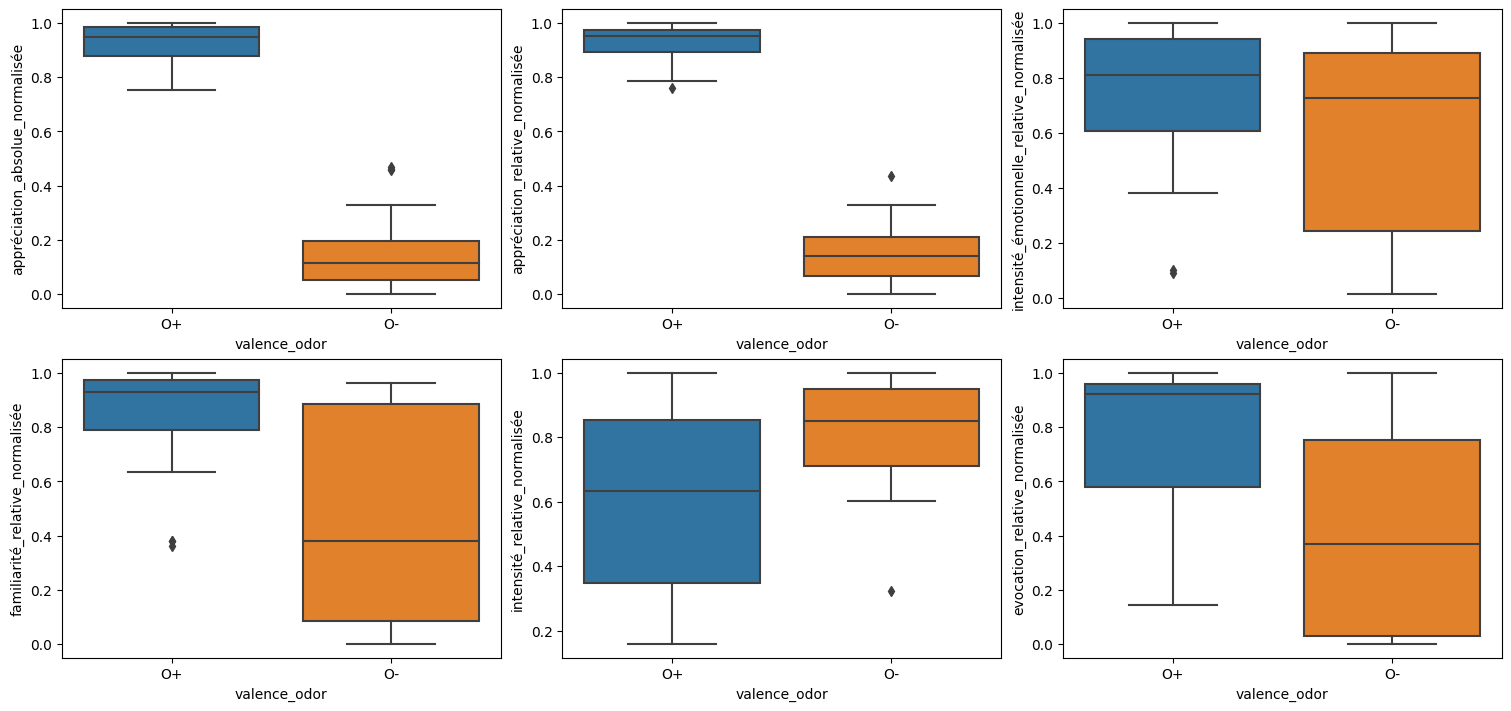

In [37]:
array_colsel = np.array(colsel).reshape(2,3)
fig, axs = plt.subplots(2,3, figsize = (15,7), constrained_layout = True)
for r in range(2):
    for c in range(3):
        y = array_colsel[r,c]
        ax = axs[r,c]
        sns.boxplot(data = valence_effect, x = 'valence_odor' , y = y,ax = ax)

In [38]:
valence_neg = valence_effect[valence_effect['valence_odor'] == 'O-']
valence_pos = valence_effect[valence_effect['valence_odor'] == 'O+']

O+


<AxesSubplot: >

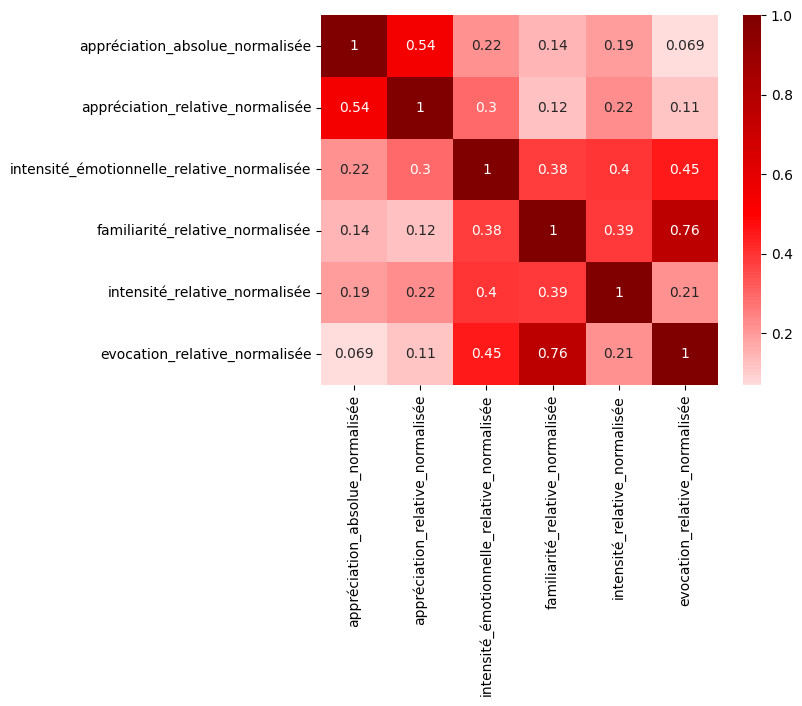

In [39]:
print('O+')
sns.heatmap(valence_pos[colsel].astype(float).corr(), annot = True, center = 0, cmap = 'seismic')

Text(0.5, 1.0, 'O+')

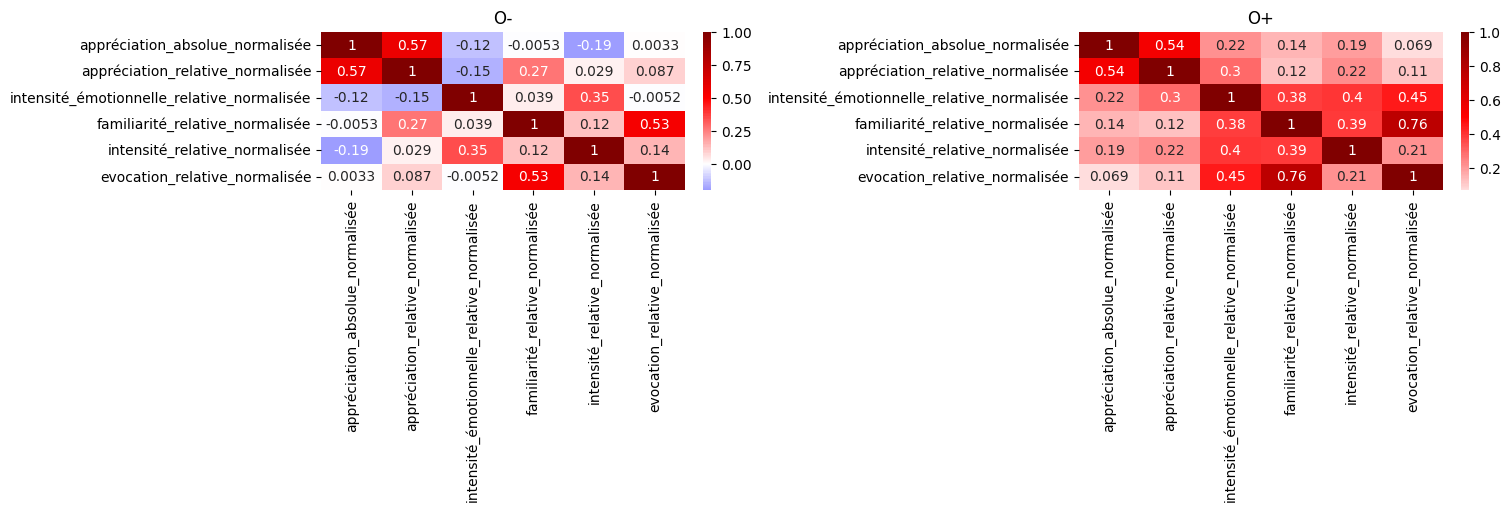

In [40]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5), constrained_layout = True)
ax = axs[0]
sns.heatmap(valence_neg[colsel].astype(float).corr(), annot = True, center = 0, cmap = 'seismic', ax=ax)
ax.set_title('O-')

ax = axs[1]
sns.heatmap(valence_pos[colsel].astype(float).corr(), annot = True, center = 0, cmap = 'seismic', ax=ax)
ax.set_title('O+')

Text(0, 0.5, 'intensité_émotionnelle_relative_normalisée')

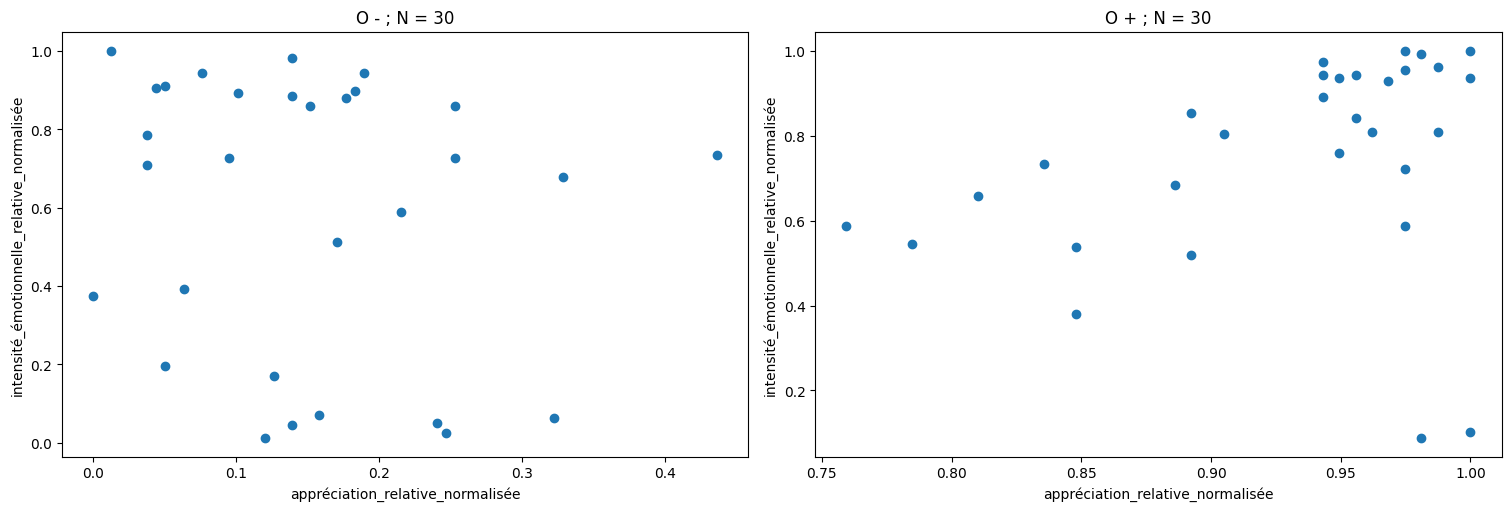

In [43]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5), constrained_layout = True)

ax = axs[0]
ax.scatter(valence_neg['appréciation_relative_normalisée'], valence_neg['intensité_émotionnelle_relative_normalisée'])
ax.set_title(f'O - ; N = {valence_neg.shape[0]}')
ax.set_xlabel('appréciation_relative_normalisée')
ax.set_ylabel('intensité_émotionnelle_relative_normalisée')

ax = axs[1]
ax.scatter(valence_pos['appréciation_relative_normalisée'], valence_pos['intensité_émotionnelle_relative_normalisée'])
ax.set_title(f'O + ; N = {valence_pos.shape[0]}')
ax.set_xlabel('appréciation_relative_normalisée')
ax.set_ylabel('intensité_émotionnelle_relative_normalisée')